# 7.2

The following rotation matrices rotate vectors in the counter clockwise direction $\theta$ about one of the three axis x,y,z. 

$R_x(\theta)= \begin{bmatrix} 1  && 0  && 0 \\ 0  && cos(\theta) && -sin(\theta) \\ 0  && sin(\theta) && cos(\theta) \end{bmatrix} $

$R_y(\theta)= \begin{bmatrix} cos(\theta)  && 0  &&  sin(\theta) \\ 0  && 1 && 0 \\ -sin(\theta)  && 0 && cos(\theta) \end{bmatrix} $

$R_z(\theta)= \begin{bmatrix} cos(\theta)  && -sin(\theta)  &&  0 \\ sin(\theta)  && cos(\theta) && 0 \\ 0 && 0 && 1 \end{bmatrix} $

For this problem we are interested in $R_z$. 

In [96]:
import numpy as np
#indentity matirx or three colums with e1,e2,e3
ei = np.identity(3)
print("A prior to transformation: \n", ei,"\n")
Rotation = lambda theta: [[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]]#this is our rotation matrix
A = Rotation(np.pi/4)#compute for 45 degrees or pi/4
print("A post pi/4 transformation about z: \n",A)

A prior to transformation: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

A post pi/4 transformation about z: 
 [[0.7071067811865476, -0.7071067811865475, 0], [0.7071067811865475, 0.7071067811865476, 0], [0, 0, 1]]


Below is code showing the transformation described in this problem along with the 3D scatter plots of the data before and after transformation. 

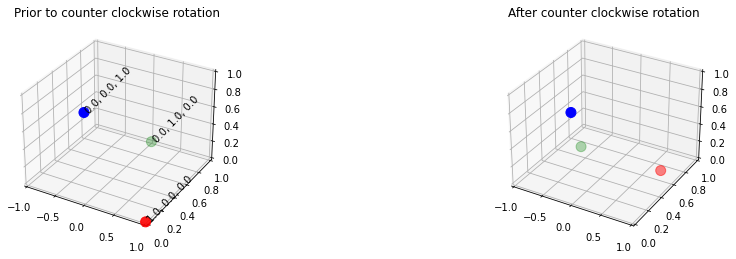

In [97]:
import matplotlib.pyplot as plt
# set up a figure 
fig = plt.figure(figsize=plt.figaspect(.25))
#first subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(ei[:][0], ei[:][1], ei[:][2], color=['red','green','blue'],s = 100)
ax.set_title('Prior to counter clockwise rotation')
ax.set_xlim([-1.0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_zlim([0, 1.0])
for x in (ei):

    text = str(x[0]) + ', ' + str(x[1]) + ', ' + str(x[2])
    ax.text(x[0], x[1], x[2], text, zdir=(1, 1, 1))
#second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(A[:][0], A[:][1], A[:][2], color=['red','green','blue'],s=100)
ax.set_title('After counter clockwise rotation')
ax.set_xlim([-1.0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_zlim([0, 1.0])
    
    
plt.show()

In [67]:
Rot = lambda theta: [[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]]
R = Rot(np.pi/3)
R


[[0.5000000000000001, -0.8660254037844386],
 [0.8660254037844386, 0.5000000000000001]]

In [68]:
#create a list of 3-D points
points = np.array([[1,0,1],[1.5,0,1.5],[2,0,2],[1,0.25,1],[1.5,0.25,1.5],[1,0.5,1]])
#Now rotate them
rpoints = np.array([A @ p for p in points])
#Show the two sets of points
import matplotlib.pyplot as plt
plt.ion()
plt.scatter([c[0] for c in points], [c[1] for c in points])
plt.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
plt.show()

NameError: name 'A' is not defined

# 7.7

In [71]:
import numpy as np
#adjacency matrix 
a = np.array([[0, 1, 1 ],[0, 0, 0],[0, 0, 0]])
a

array([[0, 1, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [72]:
a.T

array([[0, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

0 [1, 2]
1 []
2 []


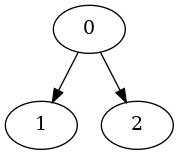

Incidence matrix: 
 [[-1 -1]
 [ 1  0]
 [ 0  1]]


In [77]:
myGraph = DirectedGraph(3)
myGraph.add_edge(0,1)
myGraph.add_edge(0,2)

display(HTML('<h2> The Graph </h2>'))
display(myGraph.display_graph())
# The incidence matrix for this graph is
A = np.array([[-1,-1],[1,0],[0,1]])
print("Incidence matrix: \n" , A)

Above is a simple graph with it's adjcancey list shown above the graph and below the graph it's incidence matrix. Note the incidence matrix can be thought of as edges being the columns and nodes as rows. This gives the incidiene matrix size V*E where V is the number of vertexes and E is the number of edges.

In the incidence matrix:
* -1 implies an edges exists and it flows (points) away from the node
* 1 implies the edge is flowing towards or directed towards the node
* 0 implies no edge exists. 

For example, in the incidence matrix A we see $A[0][0] = -1$. This implies an edges exists and it flows away from node 0. The reversed graph is shown below and we would expect that when we reverse the edges all the flows should flip sign from -1 to 1 or vice versa. This means that in the reversed graph the incidence matrix is -A. For example, $-A[0][0]$ in the reversed graph equals 1.    

0 []
1 [0]
2 [0]


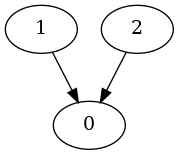

Incidence matrix after reversing G: 
 [[ 1  1]
 [-1  0]
 [ 0 -1]]


In [78]:
myGraph = DirectedGraph(3)
myGraph.add_edge(1,0)
myGraph.add_edge(2,0)

display(HTML('<h2> The Reversed Graph </h2>'))
display(myGraph.display_graph())
print("Incidence matrix after reversing G: \n" , -A)

# 7.3

We are looking for a matrix which will return the $x_2... x_{n-1}$. This is, all the contents of the vector except the first and last entry. 

As an example create our $n-vector$ call it $x$.

In [109]:
x = np.random.randint(15, size=(15, 1)) #create a matrix A of size m * n. Place random ints between 0 and 15
s = x.shape
print(s)

(15, 1)


We know the inner product of an identity matrix and a n-vector results in the n-vector. So to remove the first and last element from the n-vector x we need to add a column of zeros to the front and end of an identity matrix. This is, the matrix A will have it's first and last column be all zeros and the columns inbetween these zero columns is an identity matrix. Here we are returning a vector of size n-2 so our matrix A should be of size $(n-2)*m$. Here is an example illustrating this in python. 

In [107]:
rows = s[0]-2 #determine the number of rows that we will have in the matrix A
columnOfZeros = np.zeros((rows,1))#create two columns to append to the front and end of an identity matix of size rows*rows
I = np.identity(rows)#create identity matrix
A = np.column_stack((columnOfZeros,I,columnOfZeros))#stack columns of zeros on to both sides of and identity matrix of size I(n-2)
print("Matrix A:\n",A,"\n")#print results
print("Orginal n-vector  =\n",x,"\n")
print("Result of Ax = \n", A@x)

Matrix A:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] 

Orginal n-vector  =
 [[ 0]
 [ 2]
 [13]
 [11]
 [12]
 [ 6]
 [ 1]
 [ 2]
 [10]
 [ 0]
 [ 5]
 [ 8]
 [14]
 [10]
 [ 8]] 

Result of Ax = 
 [[ 2.]
 [13.]
 [11.]
 [12.]
 [ 6.]
 [ 1.]
 [ 2.]
 [10.]
 [ 0.]
 [ 5.]
 [ 8.]
 [14.]
 [10.]]


# 7.9 


$D(v) = ||A^Tv||^2 =\sum_{(i,j)\epsilon}(v_i - v_j)^2$

a. It is clear that the placement of $v_i$ and $v_j$ does not matter when computing the difference in the Dirichlet energy. This, is the difference of $v_i - v_j$ and $v_j - v_i$ only results in the output being negated or not. This is, in one case we get and output which is $x$ and in the other we get $-x$.  Since we square the output value the negation not need be considered as the results of a number which is sqaured is the same result regardless of the number being negative or postive. This implies that we do not need to be concerned about the directionality of the edge. 

b. It can be either or. If we are looking at a social platform with people who share age, hobbies or some other quantifier this generalization will exist for certain categories and maybe not in some other areas like ethnicity. For example, Instagram or dating sites tend to use this type of grouping. However, for a platform like Facebook this is not as clear cut as many family connections exists which implies a varying age group, professions and even education level. Here we would see high $D(v)$ for family association but maybe a low $D(v)$ for age. Still we see there are  generalization that can be made but they are of a different type. Overall, it seems like some domain specific knowledge would be useful in determining the meaning behind a high or low $D(v)$ for a category and in its context. 

# 7.10

In [81]:
from pygraphviz import AGraph
from IPython.display import Image
from IPython.core.display import display, HTML

class AdjListGraph(object): 
    # We are defining a basic graph with adjacency list
    def __init__ (self, n): 
        self.__n = n # number of vertices
        self.__edges = {} # we will use a dictionary data structure for the adj list.
        # self.__edges[i] will be a list that contains all the outgoing edges from node i
        for i in range(n):
            self.__edges[i] = []
    @property
    def n(self):
        return self.__n
    
    def get_adjacent_nodes(self, vid):
        assert vid >= 0 and vid < self.n
        return self.__edges[vid]
    
    def add_edge(self, src_id, dest_id):
        self.__edges[src_id].append(dest_id)
        
    def display_graph(self):
        G = AGraph(directed=True)
        for vid in range(self.__n):
             G.add_node(vid)
        for vid in range(self.__n):
            adj_list_v = self.__edges[vid]
            print(vid, adj_list_v)
            for wid in adj_list_v:
                G.add_edge(vid, wid)
     
        G.layout(prog='dot')
        return Image(G.draw(format='png'))

#Create Basic graph using and adjacancey list  
class DirectedGraph(AdjListGraph):
    def __init__(self, n):
        AdjListGraph.__init__(self, n)
        self.__bfs_start_node = None
        self.__visited = None
        self.__depth = None
        self.__parent = None
    

0 [1]
1 [2]
2 [0]


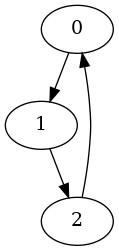

Incidince matrix: 
 [[-1  0  1]
 [ 1 -1  0]
 [ 0  1 -1]]


In [93]:
myGraph = DirectedGraph(3)
myGraph.add_edge(0,1)
myGraph.add_edge(1,2)
myGraph.add_edge(2,0)
display(HTML('<h2> Part A - Circle Graph </h2>'))
display(myGraph.display_graph())
incidince  = np.array([[-1,0,1],[1,-1,0],[0,1,-1]])
print("Incidince matrix:","\n",incidince)

b. Here we see the questions focuses on a circle graph. These types of graphs are known as cyclical and arise from data sets that are collected in increments of equal size (unless otherwise stated) and continually restart at the same point once a full cycle has been completed. This implies that all the entries of vector x are of equal size.  We see this occur in time series data such as in the stock market or in positive feed back loops.  

c . We are asked for the Dirichlet energy and provided the following... 

$D(v) = ||A^Tv||^2$

We know this can be written in Laplacian quadratic form $\displaystyle\sum_{edges(k,l)}(v_l - v_k)^2$ when associated with a graph, G. From this equation we see that the difference is dependent on the potentials at  two nodes connected by some edge. This implies that we see larger values for $D(v)$ when the potential difference across the edges are large and small when the potential is small. Note this is the sum of squares of the potential differences of $v$ for all edges in G. 


# 7.4 Convolution

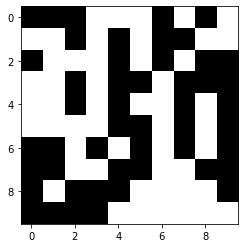

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 
im = np.random.randint(2, size=(10, 10)) #create a matrix A of size m * n. Place random ints between 0 and 15
#create 255 bit image 
img = np.array(im * 1, dtype = np.double)
#Show the image with matplotlib
plt.imshow(img, cmap="gray")
plt.show()

In [2]:
np.round(img,2)

array([[0., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [3]:
#create kernel to blurr image with. Let the PSF be 1/2 here. This is usually experimentally determined for percise optical systems. 
PSF  = np.full((2,2),1/4)
PSF

array([[0.25, 0.25],
       [0.25, 0.25]])

In [4]:
#apply filter to randomly generated gray scale image 
blurr = cv2.filter2D(img, -1, PSF)
blurr

array([[0.5 , 0.5 , 0.25, 0.5 , 0.75, 0.75, 0.5 , 0.25, 0.5 , 0.75],
       [0.5 , 0.5 , 0.25, 0.5 , 0.75, 0.75, 0.5 , 0.25, 0.5 , 0.75],
       [0.75, 0.75, 0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.25, 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.5 , 0.25, 0.5 , 0.5 , 0.25, 0.  ],
       [1.  , 1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.75, 0.5 , 0.25, 0.25],
       [1.  , 1.  , 0.75, 0.75, 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.5 ],
       [0.5 , 0.5 , 0.75, 0.75, 0.5 , 0.25, 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.  , 0.  , 0.5 , 0.75, 0.5 , 0.25, 0.5 , 0.75, 0.5 , 0.25],
       [0.25, 0.25, 0.5 , 0.5 , 0.25, 0.25, 0.75, 1.  , 0.75, 0.25],
       [0.25, 0.25, 0.25, 0.  , 0.25, 0.75, 1.  , 1.  , 1.  , 0.75]])

In [5]:
m,n = img.shape
p,q = PSF.shape
print(m,n)
print(p,q)

10 10
2 2
